# objective:
Finding the association rules to help supermarket owners find new marketing plans to improve their sales, using the 'Customer purchases history' dataset provided by Kaggle and the provided toy_dataset from the checkpoint assignment.
  
# The Apriori algorithm is commonly used in association rule mining to find frequent itemsets and generate rules.

# It states that: if an item is infrequent, then all its supersets are infrequent.

Its main steps include:

1. Identify frequent itemsets in transactions.
2. Generate association rules from these itemsets, using metrics like support, confidence, and lift.

# Running Apriori algorithm on the provided toy_dataset

In [74]:
# importing key libs
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [75]:
# provided toy_dataset
toy_dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
               ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
               ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
               ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels'],
               ['Earrings', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [76]:
# Convert dataset(encode and covert into a df)
te = TransactionEncoder()
te_ary = te.fit(toy_dataset).transform(toy_dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [77]:
# Applying Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

In [78]:
# Displaying the rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Dress),(Heels),0.4,0.4,0.4,1.0,2.50,0.24,inf,1.000000
1,(Heels),(Dress),0.4,0.4,0.4,1.0,2.50,0.24,inf,1.000000
2,(Necklace),(Dress),0.2,0.4,0.2,1.0,2.50,0.12,inf,0.750000
3,(Sandals),(Dress),0.2,0.4,0.2,1.0,2.50,0.12,inf,0.750000
4,(Dress),(Scarf),0.4,0.8,0.4,1.0,1.25,0.08,inf,0.333333
...,...,...,...,...,...,...,...,...,...,...
691,"(Earrings, Necklace)","(Scarf, Dress, Hat, Heels)",0.2,0.2,0.2,1.0,5.00,0.16,inf,1.000000
692,"(Hat, Heels)","(Earrings, Scarf, Dress, Necklace)",0.2,0.2,0.2,1.0,5.00,0.16,inf,1.000000
693,"(Hat, Necklace)","(Earrings, Scarf, Dress, Heels)",0.2,0.2,0.2,1.0,5.00,0.16,inf,1.000000
694,"(Heels, Necklace)","(Earrings, Scarf, Dress, Hat)",0.2,0.2,0.2,1.0,5.00,0.16,inf,1.000000


# interpretation of the toy_dataset rules

# definitions:
1. Antecedents and Consequents - The antecedent represents the item(s) whose purchase is assumed to lead to the purchase of the consequent item(s).
2. Support - Support indicates how frequently the antecedent and consequent items are purchased together in the dataset.
3. Confidence - Confidence shows the likelihood of purchasing the consequent given that the antecedent is purchased.
4. Lift - Lift measures the strength of an association rule compared to the probability of purchasing the consequent independently of the antecedent.
5. Leverage - Leverage indicates the difference between the observed support for the items being bought together and what would be expected if the items were independent.
6. Conviction and Zhang's Metric - Conviction reflects the strength of implication. An "inf" value for conviction, as seen for my case, indicates perfect confidence in this dataset, as no instances contradict the rule.Zhang’s metric provides an alternative measure of association. Higher values here indicate stronger positive associations.

# interpretation of observed rules above:
1. For Rules with Lift = 2.5: such as (Dress) -> (Heels) and (Heels) -> (Dress), indicate that Dress and Heels are often purchased together, suggesting a strong complementary relationship.
A marketing suggestion could be to bundle Dresses and Heels together or offer discounts when purchased as a pair
3. For Rules with Lift = 5.0: these are very strong associations, such as (Earrings, Necklace) -> (Scarf, Dress, Hat, Heels).
This means customers who purchase both Earrings and Necklace are highly likely to also purchase Scarf, Dress, Hat, and Heels.
The supermarket should consider placing these items close together in-store or highlighting them as a "complete look" package on a dummy.

# overall insight;
Rules with high lift values such as  5.0 suggest items that are often bought as a group, possibly indicating a complete outfit. For items like Dress and Heels, which consistently show strong association, the supermarket could create promotional deals or position them together onthe isles.

# exploring the checkpoint dataset

In [79]:
import pandas as pd

# Loading the dataset without headers with generic column names (20 max  items per transaction)

num_columns = 20  
column_names = [f'Item{i+1}' for i in range(num_columns)]

df = pd.read_csv('Market_Basket_Optimisation.csv', header=None, names=column_names)

# Displaying the first few rows to verify column headers
df.head()

,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


EDA

In [80]:
# Handling Missing Values and Transforming the Data

# Replace NaNs with an empty string to facilitate transformation
df.fillna('', inplace=True)

# Combine columns back into a single list per transaction
df['Items'] = df.apply(lambda row: [item for item in row if item != ''], axis=1)

# Dropping the original Item columns, keeping only the 'Items' column
df = df[['Items']]

# Verifying that each transaction is now a list of items
df.head()


,Items
0,"[shrimp, almonds, avocado, vegetables mix, gre..."
1,"[burgers, meatballs, eggs]"
2,[chutney]
3,"[turkey, avocado]"
4,"[mineral water, milk, energy bar, whole wheat ..."


Preparing the Data for Association Rule Mining

In [81]:
# Transforming the dataset into the appropriate format with TransactionEncoder

from mlxtend.preprocessing import TransactionEncoder

# Extracting only the 'Items' column as a list of transactions
transactions = df['Items'].tolist()  # This is now a list of lists (each transaction as a list of items)

# Initializing the TransactionEncoder and transforming the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Converting the transformed array into a df with the item names as columns
basket = pd.DataFrame(te_ary, columns=te.columns_)

# Verifying the binary-encoded DataFrame
basket.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Running the Apriori Algorithm on the Data

In [82]:
# Applying the Apriori algorithm to identify frequent itemsets with a minimum support threshold.

from mlxtend.frequent_patterns import apriori

# Finding frequent itemsets with a minimum support threshold.
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Display the frequent itemsets
frequent_itemsets.head()

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)


Generating Association Rules

In [83]:
from mlxtend.frequent_patterns import association_rules

# Generating rules based on confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

# Displaying the generated rules
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606


In [84]:
# extract top rules by lift  for business strategy insights
top_rules = rules.sort_values(by='lift', ascending=False).head(10)
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648


 Plotting Frequent Items

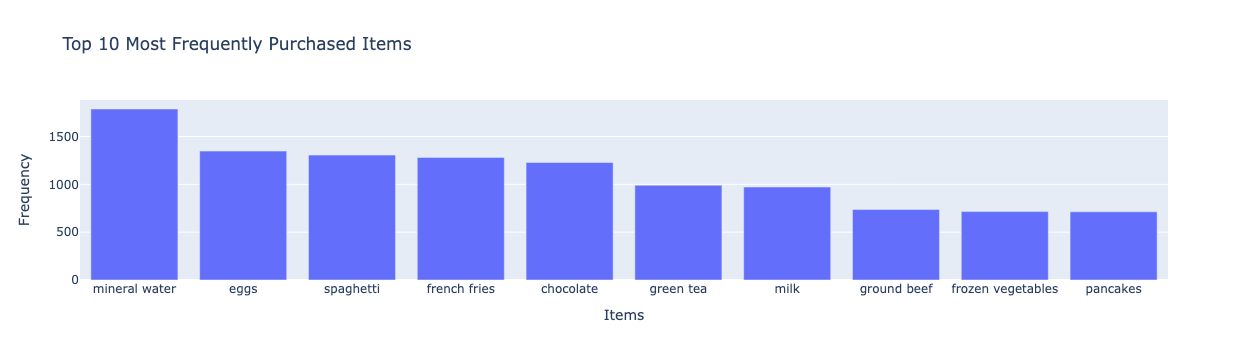

In [85]:
import plotly.express as px

# Sum up item frequencies and plot the top 10 items
item_counts = basket.sum().sort_values(ascending=False)
fig = px.bar(item_counts.head(10), x=item_counts.head(10).index, y=item_counts.head(10).values,
             labels={'x': 'Items', 'y': 'Frequency'},
             title='Top 10 Most Frequently Purchased Items')
fig.show()

# Business plan suggestions to client

1. Cross-Promote related products to increase average basket size.
The analysis is showing a  strong association between  Customers who buy mineral water and spaghetti & mineral water and chocolate and several others, this suggests opportunities for cross-promotion. The business should implement promotional bundles or discounts on related items to encourage combined purchases.

3. Implement targeted marketing campaigns based on frequent item associations. Such as loyalty program offers to promote combinations, enhancing customer engagement and sales.

5. Optimize store layout to improve accessibility of frequently paired items.

6. Manage inventory effectively to ensure popular combinations are always available, like always having mineral water and chocolate.

8. Create seasonal promotions to drive sales of related items during peak times.